<a id='gu'></a>
### HW 1

 - **Task 1**: Написать свой скрипт, который переводит изображение из формата BGR в RGB (аналог библиотечной функции cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)). Для проверки используйте изображение starry_night.jpg
  
  
- **Task 2**: Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении starry_night.jpg. 
    - **spoiler** - я поменяю местами луну и самую крупную звезду, а не голубую воронку + зато сделала скрипт, который меняет местами <u>круглые</u>, а не прямоугольные куски


- **Task 3**: Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. *Как это сделать? См. подсказку по смешиванию RGB цветов в файле color_blending.gif.*  
    - Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на dtype этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона 0 .. 255, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

#### Task 1

In [457]:
import sys
from typing import Tuple

import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [458]:
img_bgr = cv2.imread(r'images/starry_night.jpg')
# img_rgb = Image.open(r'C:\Users\User\Desktop\mag2\AI\hw_01\hw\starry_night.jpg')

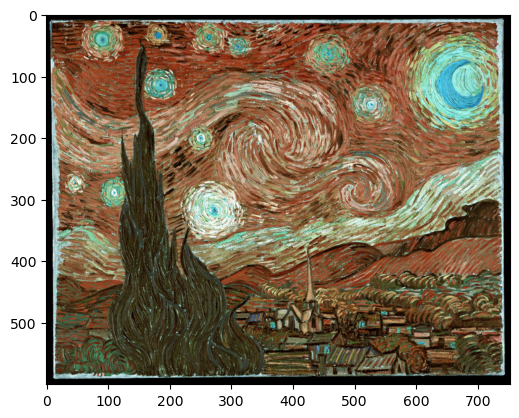

In [459]:
plt.imshow(img_bgr)
plt.show()

In [460]:
# просто меняем местами каналы (blue, green, red) --> (red, green, blue)
# любым способом
bgr_data = np.array(img_bgr)
rgb_data = bgr_data[:, :, ::-1]
rgb_data = bgr_data[:, :, [2, 1, 0]]

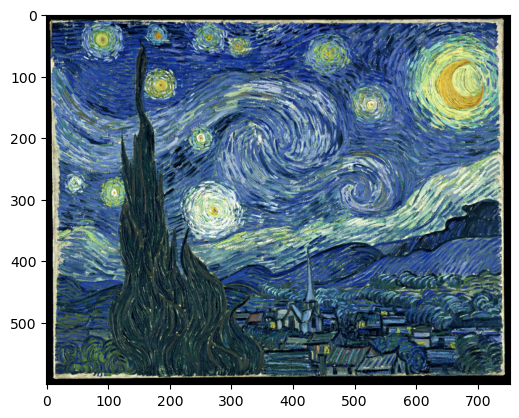

In [461]:
plt.imshow(rgb_data)
plt.show()

#### Task 2

Меняю местами луну и звезду

In [462]:
# простой способ - поменять местами два прямоугольных кусочка
def sq_swap(img_data, loc_1: Tuple, loc_2: Tuple) -> None:
    patch1 = img_data[loc_1[0]:loc_1[1], loc_1[2]:loc_1[3], :]
    patch2 = img_data[loc_2[0]:loc_2[1], loc_2[2]:loc_2[3], :]

    patch1 = cv.rotate(patch1, cv.ROTATE_90_CLOCKWISE)
    patch1 = cv.resize(patch1, (loc_2[3] - loc_2[2], loc_2[1] - loc_2[0]))
    patch2 = cv.resize(patch2, (loc_1[3] - loc_1[2], loc_1[1] - loc_1[0]))
    # plt.imshow(img_patch2)

    img_data[loc_1[0]:loc_1[1], loc_1[2]:loc_1[3], :] = patch2
    img_data[loc_2[0]:loc_2[1], loc_2[2]:loc_2[3], :] = patch1

    plt.imshow(img_data)
    plt.show()

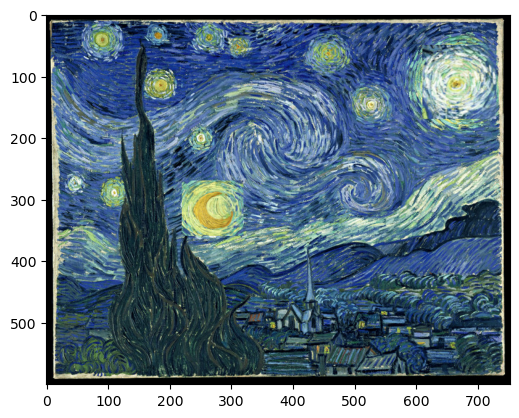

In [463]:
sq_swap(rgb_data, (270, 360, 220, 320), (50, 170, 610, 730))

In [464]:
img_bgr = cv.imread(r'images/starry_night.jpg')
rgb_data = img_bgr[:, :, ::-1]

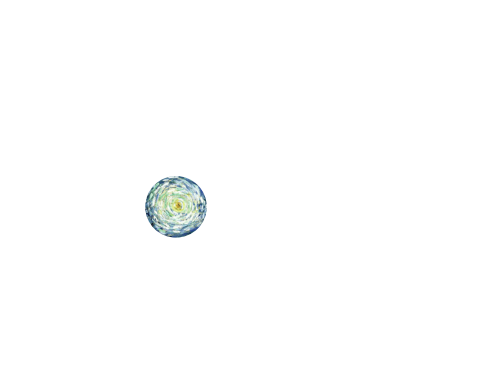

In [465]:
# сложный путь - попытки вырезать круглые куски и поменять
#  просто вырезать круглый патч - легко
fig, ax = plt.subplots()
im = ax.imshow(rgb_data)
patch = matplotlib.patches.Circle((269, 320), radius=50, transform=ax.transData)
im.set_clip_path(patch)
ax.axis('off')
plt.show()

In [346]:
rgb_data.shape

(600, 752, 3)

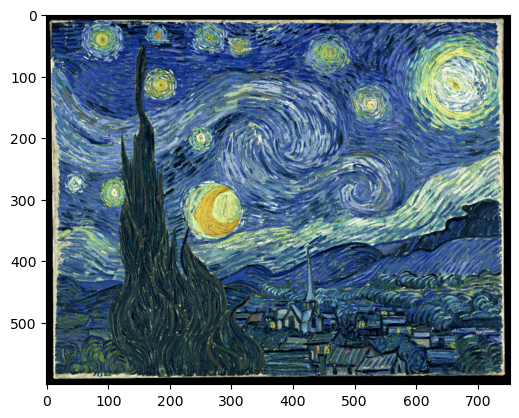

In [467]:
# тяжело взять два и поменять их местами
# делаем линспейс для круглых масок
a = np.linspace(-20 * 752 / 600, 20 * 752 / 600, 752)
b = np.linspace(-20, 20, 600)
x, y = np.meshgrid(a, b)

# выбираем место для вырезания
x_0 = 19.8  # 19.8  -7
y_0 = -12.4  # -12.4  1.3
x_02 = -7  # 19.8  -7
y_02 = 1.3  # -12.4  1.3

mask = np.sqrt((x - x_0) ** 2 + (y - y_0) ** 2)
mask2 = np.sqrt((x - x_02) ** 2 + (y - y_02) ** 2)
maskk = np.sqrt((x - x_0) ** 2 + (y - y_0) ** 2)
maskk2 = np.sqrt((x - x_02) ** 2 + (y - y_02) ** 2)

#  важно!
# даже если радиусы одинаковые не факт: что
# попиксельный размер патчей совпадет
# нужно подобрать радиусы так чтобы размеры патчей в пикселях совпали
r = 3
r2 = 3.001  # 4  3

# делаем две маски для каждого пятча отдельно соответственно
for i in range(0, 600):
        for j in range(0, 752):
            if (mask[i, j] < r):
                mask[i, j] = 1
            elif (mask[i, j] >= r):
                mask[i, j] = 0
            
for i in range(0, 600):
        for j in range(0, 752):
            if (mask2[i, j] < r2):
                mask2[i, j] = 1 # 1  0
            elif (mask2[i, j] >= r2):
                mask2[i, j] = 0 # 0  1
                
#  делаем маску для картинки с двумя дырками        
for i in range(0, 600):
        for j in range(0, 752):
            if (maskk[i, j] < r) | (maskk2[i, j] < r2):
                maskk[i, j] = 0
                maskk2[i, j] = 0
            elif (maskk[i, j] >= r) | (maskk2[i, j] >= r2):
                maskk[i, j] = 1
                maskk2[i, j] = 1
# # maskimg = plt.imshow(mask, cmap="gray")
# # plt.show()
# # mask = mask[:, :, np.newaxis] + np.array([0, 1, 0])
# # mask = np.transpose(mask)[:, :, np.newaxis] + np.array([0, 0, 0])

# все что происходит нидже делается поканально

# делаем картинку с двумя дырками
im_r = np.multiply(rgb_data[:, :, 0], maskk)
im_g = np.multiply(rgb_data[:, :, 1], maskk)
im_b = np.multiply(rgb_data[:, :, 2], maskk)
im_r = np.multiply(im_r, maskk2)
im_g = np.multiply(im_g, maskk2)
im_b = np.multiply(im_b, maskk2)

# сделали две разные маски для двух разных патчей
#  на одной - первый патч, на второй - другой
#  теперь меняем их местами и объединяем на одну картинку
img_masked_r = np.multiply(rgb_data[:, :, 0], mask)
img_masked_g = np.multiply(rgb_data[:, :, 1], mask)
img_masked_b = np.multiply(rgb_data[:, :, 2], mask)
img_masked_r2 = np.multiply(rgb_data[:, :, 0], mask2)
img_masked_g2 = np.multiply(rgb_data[:, :, 1], mask2)
img_masked_b2 = np.multiply(rgb_data[:, :, 2], mask2)
tmp_r = img_masked_r[img_masked_r > 0]
tmp_g = img_masked_g[img_masked_g > 0]
tmp_b = img_masked_b[img_masked_b > 0]
tmp_r2 = img_masked_r2[img_masked_r2 > 0]
tmp_g2 = img_masked_g2[img_masked_g2 > 0]
tmp_b2 = img_masked_b2[img_masked_b2 > 0]
img_masked_r[img_masked_r > 0] = tmp_r2
img_masked_g[img_masked_g > 0] = tmp_g2
img_masked_b[img_masked_b > 0] = tmp_b2
img_masked_r[img_masked_r2 > 0] = tmp_r
img_masked_g[img_masked_g2 > 0] = tmp_g
img_masked_b[img_masked_b2 > 0] = tmp_b
# img_masked = np.dstack((img_masked_r, img_masked_g, img_masked_b)).astype(np.int32)
# теперь вставляем на картинку с вдумя дырками картинку с двумя поменянными патчами
im_r[img_masked_r > 0] = img_masked_r[img_masked_r > 0]
im_r[img_masked_r > 0] = img_masked_r[img_masked_r > 0]
im_r[img_masked_r > 0] = img_masked_r[img_masked_r > 0]
im_g[img_masked_g > 0] = img_masked_g[img_masked_g > 0]
im_g[img_masked_g > 0] = img_masked_g[img_masked_g > 0]
im_g[img_masked_g > 0] = img_masked_g[img_masked_g > 0]
im_b[img_masked_b > 0] = img_masked_b[img_masked_b > 0]
im_b[img_masked_b > 0] = img_masked_b[img_masked_b > 0]
im_b[img_masked_b > 0] = img_masked_b[img_masked_b > 0]
im_masked = np.dstack((im_r, im_g, im_b)).astype(np.int32)
plt.imshow(im_masked)
Image.fromarray((im_masked).astype(np.uint8)).save('images/circle_patch_swap.jpg')
plt.show()

In [348]:
# делаем прозрачный пнг фон
# file_name = "sv.jpg"
# src = cv.imread(file_name, 1)
# # img_float32 = np.float32(src)
# # src = cv.cvtColor(img_float32, cv.COLOR_RGB2HSV)
# tmp = cv.cvtColor(src, cv2.COLOR_BGR2GRAY)
# _, alpha = cv.threshold(tmp, 0, 255, cv2.THRESH_BINARY)
# b, g, r = cv.split(src)
# rgba = [b, g, r, alpha]
# dst = cv.merge(rgba, 4)
# # cv.imwrite("test.png", dst)

#### Task 3

In [449]:
def plot_compare(img_night: np.ndarray, img_day: np.ndarray) -> None:    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    plt.imshow(img_night)
    plt.title('Starry night')
    
    plt.subplot(122)
    plt.imshow(img_day)
    plt.title('Starry day')
    plt.show()

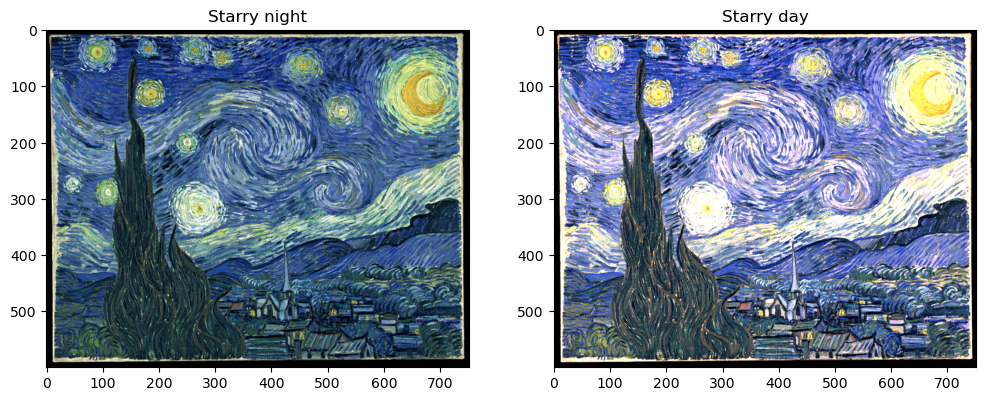

In [456]:
img_bgr = cv.imread('images/starry_night.jpg')
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
try_im = img.copy()
try_im[:, :, 0] = try_im[:, :, 0] * 0.75
try_im[:, :, 1] = try_im[:, :, 1] / 1.8
try_im[:, :, 2] = try_im[:, :, 2] / 1.8
cv.convertScaleAbs(try_im, try_im, 2.5)

plot_compare(img, try_im)

In [363]:
# img.dtype

# arr = img * np.array([1.2, 1.4, 1.8])

# img2 = (255 * arr / arr.min()).astype(np.uint8)

# img2.dtype

# img2.max()

dtype('uint8')

[**GO UP**](#gu)

### Prepractice

In [25]:
# Create a black image
img = np.zeros((512, 512, 3), np.uint8)

In [37]:
# Draw a diagonal red line with thickness of 5 px
cv.line(img, (0, 0), (250, 511), (255, 0, 0), 5)
# cv.line(img, (0, 0), (250, 511), (0, 250, 0), 5)
pass

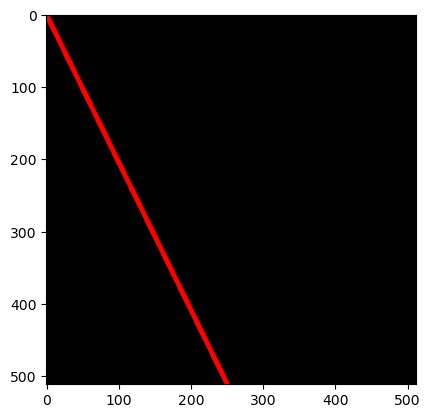

In [38]:
plt.imshow(img)
plt.show()

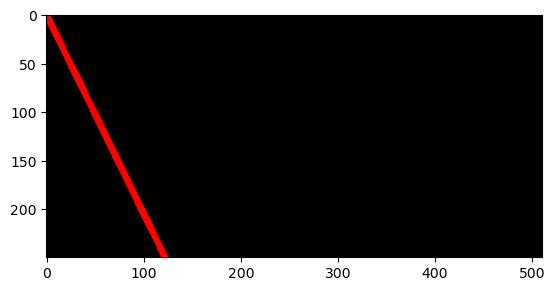

In [39]:
img_crop = img[:250, :511, :]
plt.imshow(img_crop)
plt.show()

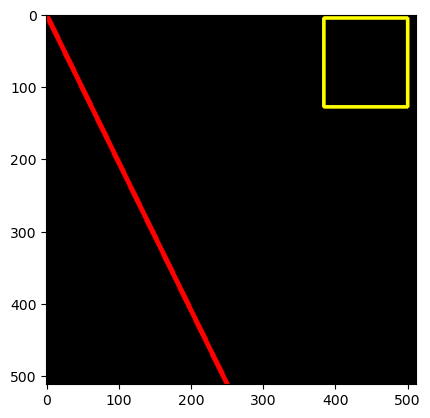

In [40]:
# To draw a rectangle, you need top-left corner and bottom-right corner of rectangle.
# This time we will draw a green rectangle at the top-right corner of image.
cv.rectangle(img, (384, 5), (500, 128), (255, 255, 0), 3)
plt.imshow(img)
plt.show()

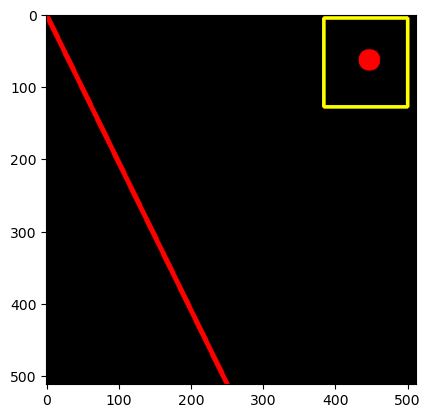

In [41]:
# To draw a circle, you need its center coordinates and radius.
# We will draw a circle inside the rectangle drawn above.
cv.circle(img, (447, 63), 15, (255, 0, 0), -1)
plt.imshow(img)
plt.show()

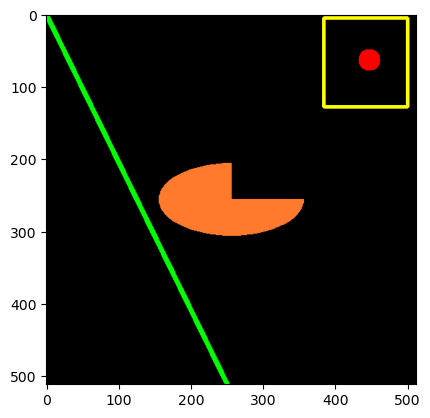

In [14]:
cv.ellipse(
    img,
    # center
    (256, 256),
    # axes
    (100, 50),
    # angle
    0,
    # startAngle
    0,
    # endAngle
    270,
    # color
    (255, 122, 45),
    # thickness (filled if negative)
    -1)
plt.imshow(img)
plt.show()

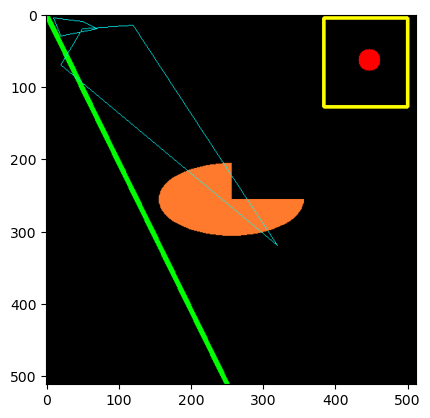

In [15]:
pts1 = np.array([
    [10, 5], [20, 30], [70, 20], [50, 10]
], np.int32)
pts1 = pts1.reshape((-1, 1, 2))

pts2 = np.array([
    [120, 15], [320, 320], [20, 70], [50, 20]
], np.int32)
pts2 = pts2.reshape((-1, 1, 2))

cv.polylines(img, [pts1, pts2], True, (0, 255, 255))
plt.imshow(img)
plt.show()

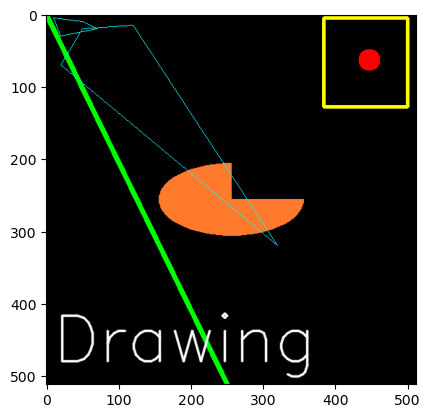

In [16]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img, 'Drawing', (10, 480), font, 3, (255, 255, 255), 2, cv.LINE_AA)
plt.imshow(img)
plt.show()

In [4]:
img = cv.imread("assets/noisy_image.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
# plt.show()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [40]:
kernel = np.ones((20, 20), np.float32) * 1/400
img_res = cv.filter2D(img, -1, kernel)

In [48]:
img.shape

(1258, 940, 3)

In [44]:
img_res = cv.blur(img, (5, 5))

In [53]:
img_res = cv.GaussianBlur(img, (21, 21), 0)

In [59]:
img_res = cv.bilateralFilter(img, 9, 75, 75)

In [65]:
img_res = cv.medianBlur(img, 3)

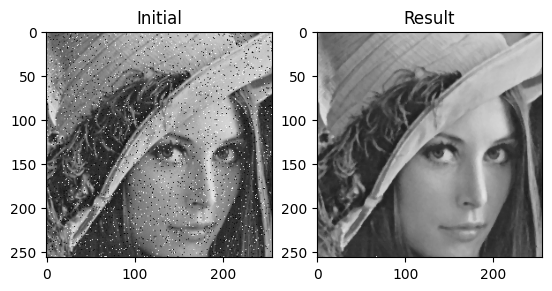

In [66]:
plt.subplot(121), plt.imshow(img, cmap="gray"), plt.title('Initial')
plt.subplot(122), plt.imshow(img_res, cmap="gray"), plt.title('Result')
plt.show()